In [1]:
#pip install modin[all]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import  keras
from kerastuner.tuners import RandomSearch
from keras import layers
from keras.layers import Dense
from keras import Sequential
#import modin.pandas as pd #using modin module to 70x pd computational speed
#import ray
#ray.init(runtime_env={'env_vars': {'__MODIN_AUTOIMPORT_PANDAS__': '1'}})

C:\Users\Hi\AppData\Local\Temp\ipykernel_8980\2682436600.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
fire=pd.read_csv("C:\\Users\\Hi\\Desktop\\Python Datasets\\forestfires.csv")

In [4]:
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,0.00
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,0.00
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,0.00
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,0.00
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,large,6.44
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,large,54.29
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,large,11.16
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,small,0.00


In [5]:
fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,0.164410,0.143133,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,0.371006,0.350548,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1090.840000


In [6]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  dayfri         517 non-null    int64  
 11  daymon         517 non-null    int64  
 12  daysat         517 non-null    int64  
 13  daysun         517 non-null    int64  
 14  daythu         517 non-null    int64  
 15  daytue         517 non-null    int64  
 16  daywed         517 non-null    int64  
 17  monthapr       517 non-null    int64  
 18  monthaug  

In [7]:
fire=fire.drop(['month','day'], axis=1)

In [8]:
fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,1,0,0,0,0,small,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,1,0,small,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,1,0,small,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,1,0,0,0,0,small,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,1,0,0,0,0,small,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0,0,...,0,0,0,0,0,0,0,0,large,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0,0,...,0,0,0,0,0,0,0,0,large,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0,0,...,0,0,0,0,0,0,0,0,large,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0,0,...,0,0,0,0,0,0,0,0,small,0.00


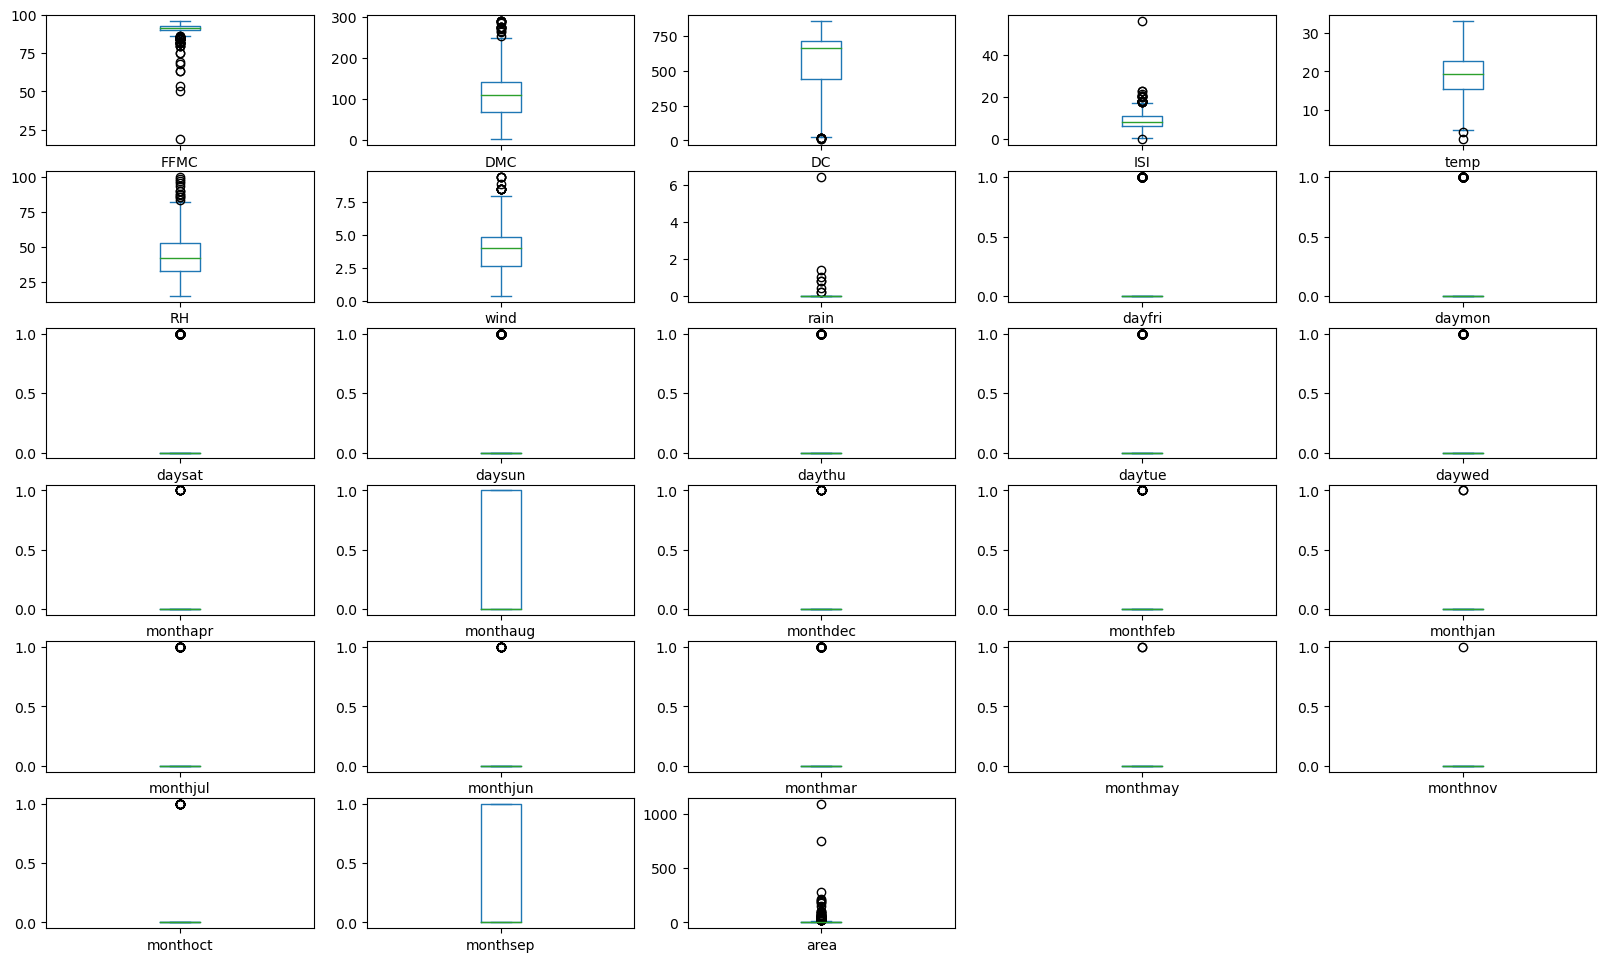

In [9]:
fire.plot(kind='box',subplots=True, layout=(10,5),figsize=(20,20))
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [11]:
le=LabelEncoder()
fire['size_category']=le.fit_transform(fire['size_category'])
fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,1,0,0,0,0,1,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,1,0,0,0,0,1,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0,0,...,0,0,0,0,0,0,0,0,0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0,0,...,0,0,0,0,0,0,0,0,0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0,0,...,0,0,0,0,0,0,0,0,0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0.00


In [12]:
scaler=StandardScaler()
fire[['FFMC','DMC','DC','ISI','temp','RH','wind','rain']]=scaler.fit_transform(fire[['FFMC','DMC','DC','ISI','temp','RH','wind','rain']])
fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,area
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,1,0,...,0,0,0,1,0,0,0,0,1,0.00
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0,0,...,0,0,0,0,0,0,1,0,1,0.00
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0,0,...,0,0,0,0,0,0,1,0,1,0.00
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,1,0,...,0,0,0,1,0,0,0,0,1,0.00
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0,0,...,0,0,0,1,0,0,0,0,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,0,0,...,0,0,0,0,0,0,0,0,0,6.44
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0,0,...,0,0,0,0,0,0,0,0,0,54.29
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,0,0,...,0,0,0,0,0,0,0,0,0,11.16
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,0,0,...,0,0,0,0,0,0,0,0,1,0.00


In [13]:
from scipy import stats
zsc=stats.zscore(fire)
zscores=np.abs(zsc)
filter_zscores=(zscores<3).all(axis=1)
filtered=fire[filter_zscores]

In [14]:
filtered.shape

(395, 29)

In [15]:
fire.shape

(517, 29)

In [16]:
filtered

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,area
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,1,0,...,0,0,0,1,0,0,0,0,1,0.00
5,0.300161,-0.399665,-0.241863,1.246598,0.570734,-0.937830,0.772325,-0.073268,0,0,...,0,0,0,0,0,0,0,0,1,0.00
6,0.300161,-0.343401,-0.211197,-0.114524,0.898263,-1.060516,-0.512650,-0.073268,0,1,...,0,0,0,0,0,0,0,0,1,0.00
7,0.155096,0.539625,0.243154,0.368455,-1.877117,2.558742,-1.015466,-0.073268,0,1,...,0,0,0,0,0,0,0,0,1,0.00
8,0.064430,0.291128,0.583715,-0.443828,-0.997959,1.147845,0.772325,-0.073268,0,0,...,0,0,0,0,0,0,0,1,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.569770,-0.736124,-0.073268,0,0,...,0,0,0,0,0,0,0,0,1,0.00
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,0,0,...,0,0,0,0,0,0,0,0,0,6.44
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0,0,...,0,0,0,0,0,0,0,0,0,54.29
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,0,0,...,0,0,0,0,0,0,0,0,0,11.16


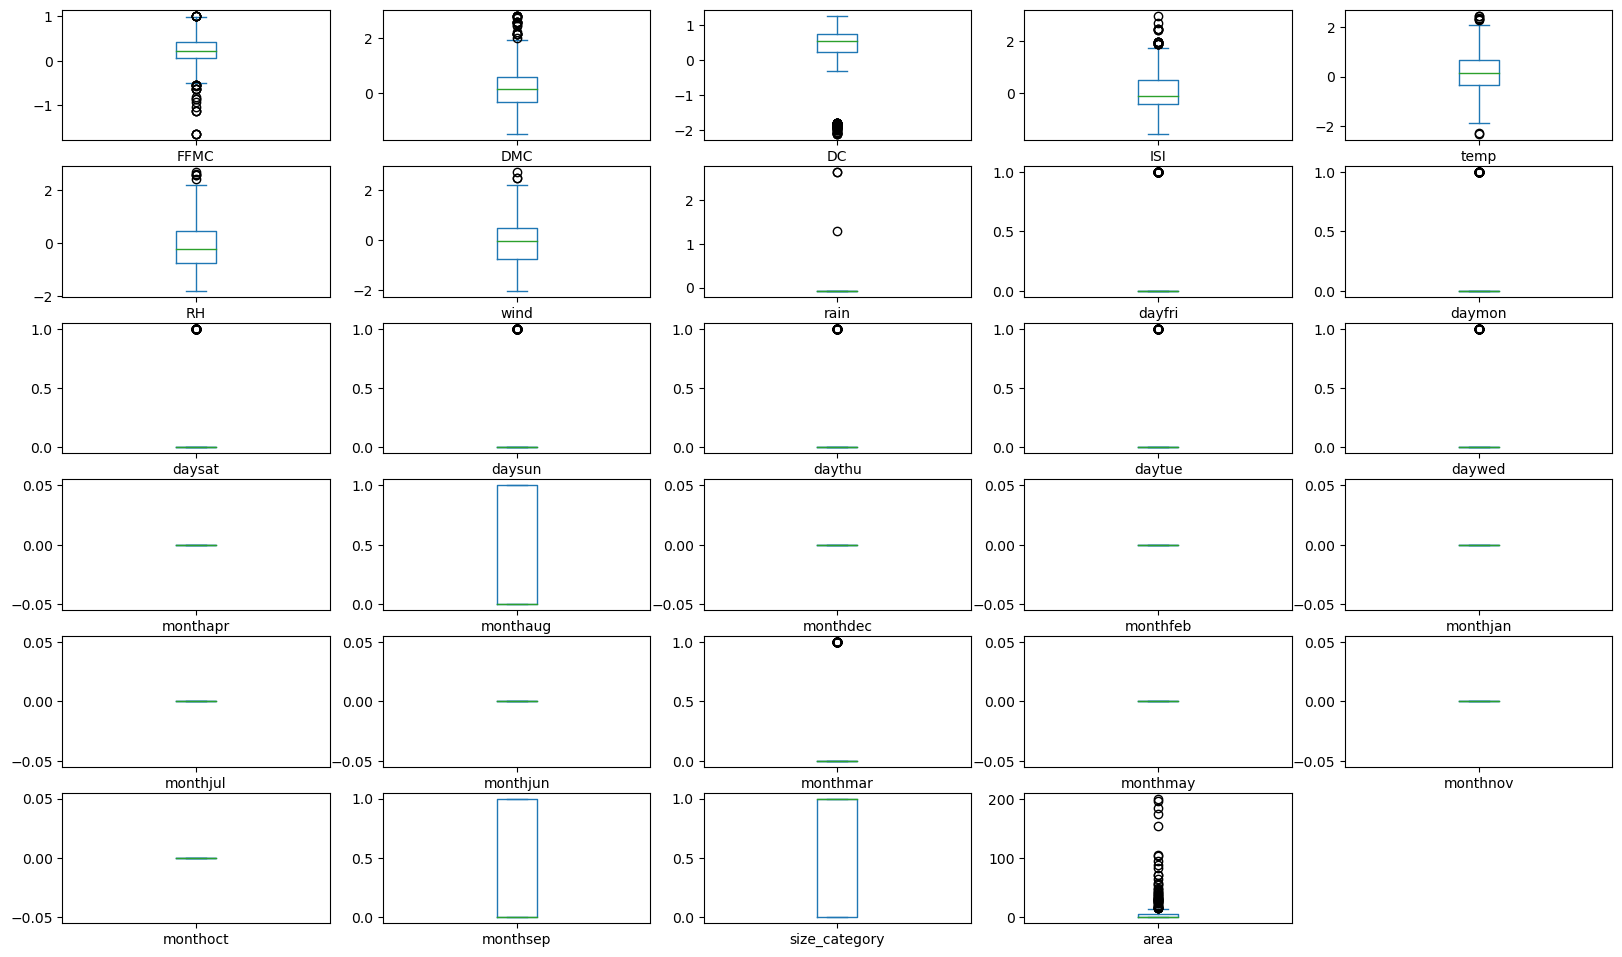

In [17]:
filtered.plot(kind='box',subplots=True, layout=(10,5),figsize=(20,20))
plt.show()

In [18]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(contamination=0.05,random_state=0)
clf.fit(filtered)


c:\Users\Hi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=0)

In [19]:
filtered['anomaly']=clf.predict(filtered)
filtered

C:\Users\Hi\AppData\Local\Temp\ipykernel_8980\2527682585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['anomaly']=clf.predict(filtered)


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,area,anomaly
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,1,0,...,0,0,1,0,0,0,0,1,0.00,1
5,0.300161,-0.399665,-0.241863,1.246598,0.570734,-0.937830,0.772325,-0.073268,0,0,...,0,0,0,0,0,0,0,1,0.00,1
6,0.300161,-0.343401,-0.211197,-0.114524,0.898263,-1.060516,-0.512650,-0.073268,0,1,...,0,0,0,0,0,0,0,1,0.00,1
7,0.155096,0.539625,0.243154,0.368455,-1.877117,2.558742,-1.015466,-0.073268,0,1,...,0,0,0,0,0,0,0,1,0.00,1
8,0.064430,0.291128,0.583715,-0.443828,-0.997959,1.147845,0.772325,-0.073268,0,0,...,0,0,0,0,0,0,1,1,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.569770,-0.736124,-0.073268,0,0,...,0,0,0,0,0,0,0,1,0.00,1
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,0,0,...,0,0,0,0,0,0,0,0,6.44,-1
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0,0,...,0,0,0,0,0,0,0,0,54.29,-1
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,0,0,...,0,0,0,0,0,0,0,0,11.16,-1


In [20]:
filtered.shape

(395, 30)

In [21]:
# through Isolation forest we have dropped 20 records at assumption of 5% contamination
filtered.drop(filtered[filtered['anomaly']==-1].index,inplace=True)
filtered.shape

C:\Users\Hi\AppData\Local\Temp\ipykernel_8980\532726151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.drop(filtered[filtered['anomaly']==-1].index,inplace=True)


(375, 30)

In [22]:
filtered=filtered.drop(['anomaly'],axis=1)
filtered

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,area
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,1,0,...,0,0,0,1,0,0,0,0,1,0.00
5,0.300161,-0.399665,-0.241863,1.246598,0.570734,-0.937830,0.772325,-0.073268,0,0,...,0,0,0,0,0,0,0,0,1,0.00
6,0.300161,-0.343401,-0.211197,-0.114524,0.898263,-1.060516,-0.512650,-0.073268,0,1,...,0,0,0,0,0,0,0,0,1,0.00
7,0.155096,0.539625,0.243154,0.368455,-1.877117,2.558742,-1.015466,-0.073268,0,1,...,0,0,0,0,0,0,0,0,1,0.00
8,0.064430,0.291128,0.583715,-0.443828,-0.997959,1.147845,0.772325,-0.073268,0,0,...,0,0,0,0,0,0,0,1,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.064430,0.875644,0.825821,-0.421874,1.208554,-0.201709,-0.233308,-0.073268,1,0,...,0,0,0,0,0,0,0,0,1,0.00
508,0.064430,0.875644,0.825821,-0.421874,1.208554,-0.201709,-0.233308,-0.073268,1,0,...,0,0,0,0,0,0,0,0,1,0.00
510,0.064430,0.875644,0.825821,-0.421874,-0.118801,1.086501,0.772325,-0.073268,1,0,...,0,0,0,0,0,0,0,0,1,0.43
511,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.569770,-0.736124,-0.073268,0,0,...,0,0,0,0,0,0,0,0,1,0.00


In [23]:
X=filtered.iloc[:,:28]
Y=filtered.iloc[:,28:]
Y

,area
0,0.00
5,0.00
6,0.00
7,0.00
8,0.00
...,...
507,0.00
508,0.00
510,0.43
511,0.00


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)
#converting train test variable to array in order to use modin,pandas to improve computational speed by 70x
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV


In [25]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model=Sequential()
    model.add(Dense(neuron1,input_dim=8,kernel_initializer=init,activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim=8,kernel_initializer=init,activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    adam= Adam(learning_rate=learning_rate)
    model.compile(loss='rmsprop',optimizer=adam,metrics=['accuracy','mse'])
    return model

#Create Model 
model =KerasRegressor(build_fn=create_model,verbose=0)

#Define Grid Search
batch_size=[10,20,40]
epochs=[10,50,100]
learning_rate=[0.1,0.01,0.001]
dropout_rate=[0.0,0.1,0.2]
activation_function=['softmax','relu','tanh','linear']
init=['uniform','normal','zero']
neuron1=[4,8,16]
neuron2=[2,4,8]

#Make a dictionary of Grid Search parameters
params_grid =dict(batch_size=batch_size,epochs=epochs,learning_rate=learning_rate,dropout_rate=dropout_rate,activation_function=activation_function
                  , init=init,neuron1=neuron1,neuron2=neuron2)

#Build and fit the GridsearchCV
grid=GridSearchCV(estimator=model,param_grid=params_grid,verbose=11)
grid.fit(X,Y)


C:\Users\Hi\AppData\Local\Temp\ipykernel_8980\4266945810.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model =KerasRegressor(build_fn=create_model,verbose=0)


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   0.3s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1,

KeyboardInterrupt: 

In [ ]:

def build_model(hp):
    model=keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model.add(layers.Dense(units=hp.Int('units_'+ str(i), min_value=32,max_value=152,step=32),activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid'])))
        model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        model.add(layers.Dense(1,activation='linear'))
        model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),loss='mean_absolute_error',metrics=['mean_absolute_error'])
    return model

In [ ]:
tuner= RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,executions_per_trial=3,directory='project',project_name='Forest Fires',overwrite=True)

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.search(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

In [ ]:
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
model.fit(x_train,y_train,epochs=100,initial_epoch=6,validation_data=(x_test,y_test))

In [ ]:
model.summary()